**Disclaimer**: This file only contains the code only.

# 1 Data Preparation

In [2]:
suppressWarnings(library(tidyverse))
suppressMessages(library(scales))
library(ggpubr)
library(ggsignif)

In [8]:
# importing data
insurance <- 
  read_csv("insurance.csv", show_col_types = F)

# checking first-10 rows of data
insurance |> head()

age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [9]:
# How many cols and rows does the data have?
dim(insurance)

[1] 1338    7

In [10]:
# Does the data contain missing values?
sum(is.na(insurance))

[1] 0

In [11]:
# Does the data have duplicated values?
sum(duplicated(insurance))

[1] 1

In [12]:
# Duplicate removal
insurance <- 
  insurance %>%
  distinct()

# How many observations and variables does the data contain now?
dim(insurance)

[1] 1337    7

# 1 Descriptive Statistics

## 1.1 Mean of Ages

In [17]:
# What is the overall mean of plocyholders' ages?
mean(insurance$age) %>%
  round(digits = 3)

[1] 39.222

In [18]:
options(dplyr.summarise.inform = FALSE)
insurance %>%
  group_by(smoker, sex) %>%
  summarize(mean.age = round(mean(age), digits = 2),
          mean.bmi = round(mean(bmi), digits = 2),
          mean.children = round(mean(children), digits = 2),
          mean.charges = round(mean(charges), digits = 2))

smoker,sex,mean.age,mean.bmi,mean.children,mean.charges
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
no,female,39.69,30.54,1.09,8762.30
no,male,39.10,30.77,1.09,8099.70
yes,female,38.61,29.61,1.01,30679.00
yes,male,38.45,31.50,1.19,33042.01


## 1.2 Mean of Smokers' BMI

In [19]:
# What is the mean of smokers' BMI?
insurance %>%
  filter(smoker %in% 'yes') %>%
  summarize(mean = mean(bmi)) %>%
  round(digits = 3)

mean
<dbl>
30.708


## 1.3 Variances of Charges for Smokers and Non-smokers

In [20]:
var(insurance$charges)
sd(insurance$charges)

[1] 146660811

[1] 12110.36

## 1.4 Means of Ages across M and F Smokers

In [21]:
# Do male and female smokers have different ages?
age_means <- 
  insurance %>%
  filter(smoker %in% 'yes') %>%
  group_by(sex) %>%
  summarize(age_mean = mean(age))

age_means

sex,age_mean
<chr>,<dbl>
female,38.60870
male,38.44654


## 1.5 Means of Charges between Smokers and Nonsmokers

In [22]:
# Do smokers and nonsmokers have different insurance charges?
insurance %>%
  group_by(smoker) %>%
  summarize(charges_mean = mean(charges))

smoker,charges_mean
<chr>,<dbl>
no,8440.66
yes,32050.23


## 1.6 Mean of Charges for BMI \> 25 and BMI \< 25

In [23]:
# Do policyholders with different BMI groups have different charges?
bmi.above25 <-
  insurance %>%
  filter(bmi > 25) %>%
  summarize(mean.charges.above = mean(charges))

bmi.under25 <-
  insurance %>%
  filter(bmi < 25) %>%
  summarize(mean.charges.below = mean(charges))

bind_cols(bmi.under25, bmi.above25) %>%
  pivot_longer(mean.charges.below:mean.charges.above,
               names_to = "Category",
               values_to = "Value")

Category,Value
<chr>,<dbl>
mean.charges.below,10282.22
mean.charges.above,13957.77


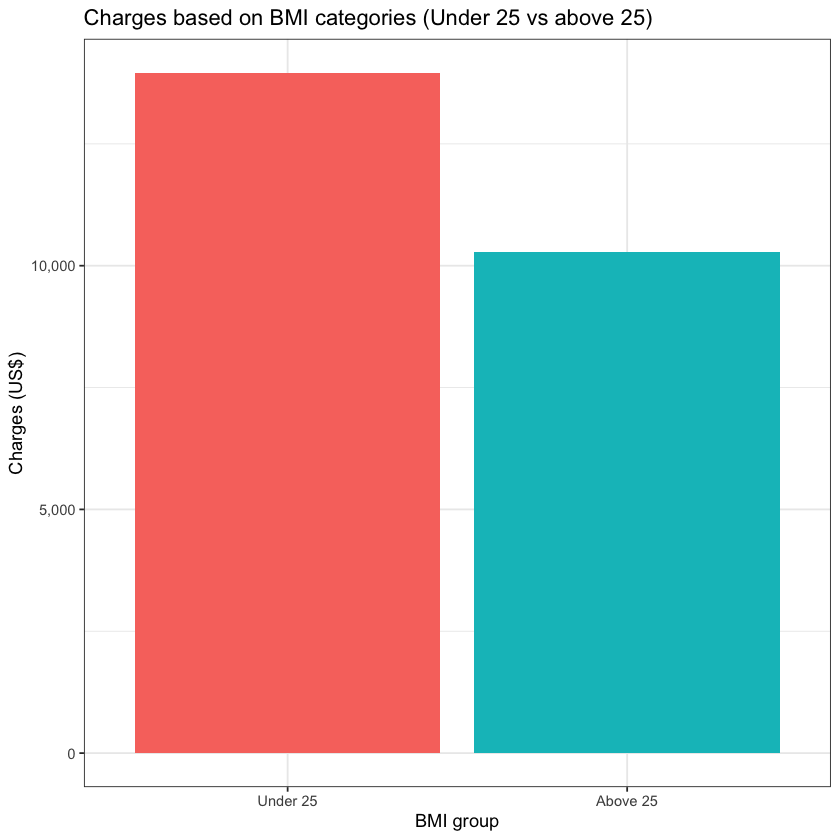

In [24]:
bind_cols(bmi.under25, bmi.above25) %>%
  pivot_longer(mean.charges.below:mean.charges.above,
               names_to = "Category",
               values_to = "Value") %>%
  ggplot(aes(x = Category, y = Value)) +
  geom_col(aes(fill = Category), show.legend = F) +
  scale_x_discrete(labels = c("Under 25", "Above 25")) +
  scale_y_continuous(labels = comma) +
  labs(title = "Charges based on BMI categories (Under 25 vs above 25)",
       x = "BMI group", y = "Charges (US$)") +
  theme_bw()

## 1.7 Mean of BMI across Genders

In [25]:
# Do M and F policy holders have different BMI?
insurance %>%
  group_by(sex) %>%
  summarize(bmi_mean = mean(bmi))

sex,bmi_mean
<chr>,<dbl>
female,30.37775
male,30.94365


## 1.8 Mean of BMI across Smoking Groups

In [26]:
# Are the means of BMI across smoking groups different?
insurance %>%
  group_by(smoker) %>%
  summarize(bmi_mean = mean(bmi))

smoker,bmi_mean
<chr>,<dbl>
no,30.65185
yes,30.70845


# 2 Categorical Variables

## 2.1 Probability Distribution of Charges per Region

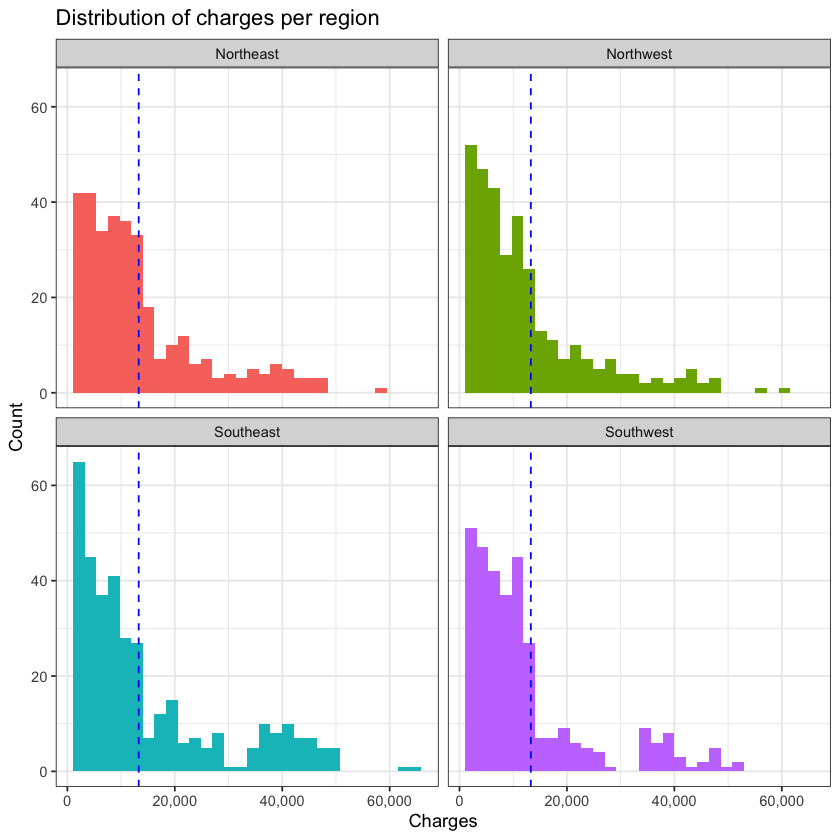

In [27]:
ggplot(insurance, aes(x = charges)) +
  geom_histogram(aes(fill = region),
                 bins = 30, show.legend = F) +
  geom_vline(xintercept = mean(insurance$charges),
             lty = 2, color = "blue") +
  scale_x_continuous(labels = comma) +
  theme_bw() + labs(title = "Distribution of charges per region",
                    x = "Charges", y = "Count") +
  facet_wrap(~ region,
             labeller = as_labeller(
               c("northeast" = "Northeast",
                 "northwest" = "Northwest",
                 "southeast" = "Southeast",
                 "southwest" = "Southwest")))

## 2.2 Charges across Genders

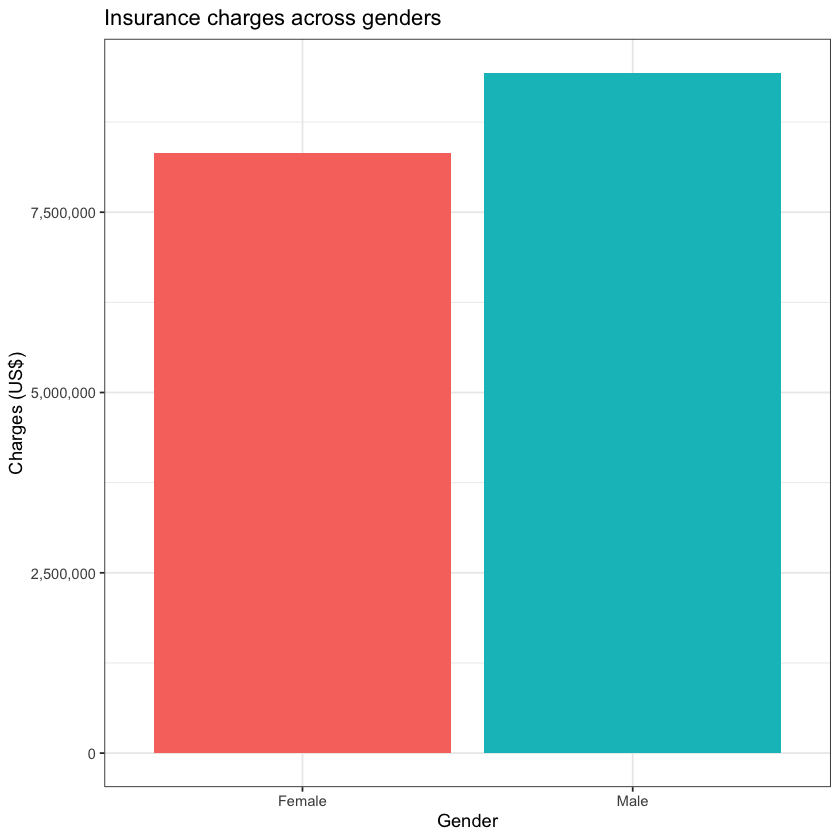

In [28]:
ggplot(insurance, aes(x = sex, y = charges)) +
  geom_col(aes(fill = sex), show.legend = F) +
  theme_bw() +
  labs(title = "Insurance charges across genders",
       y = "Charges (US$)",
       x = "Gender") +
  scale_y_continuous(labels = comma) +
  scale_x_discrete(
    labels = c("Female", "Male")
  )

## 2.3 Proportion of Policyholders by Region?

In [29]:
by_region <- 
  insurance %>%
  group_by(region) %>%
  summarise(counts = n()) %>%
  mutate(prop = (counts/sum(counts))*100)

by_region

region,counts,prop
<chr>,<int>,<dbl>
northeast,324,24.23336
northwest,324,24.23336
southeast,364,27.22513
southwest,325,24.30815


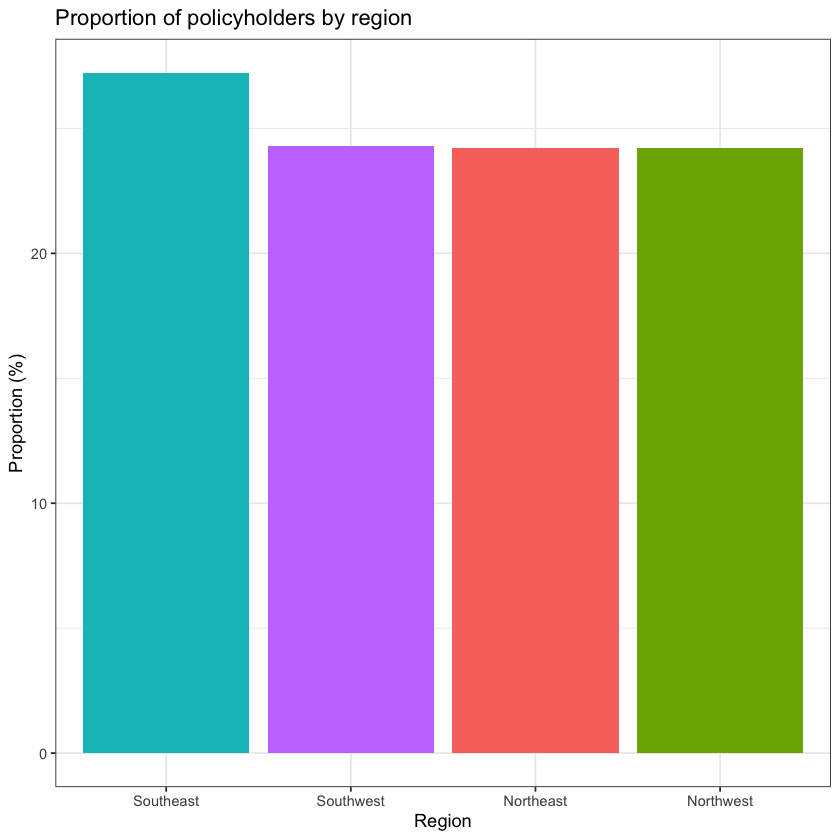

In [30]:
by_region %>%
  ggplot(aes(x = reorder(region, -prop), y = prop)) +
  geom_col(aes(fill = region), show.legend = F) +
  theme_bw() +
  labs(title = "Proportion of policyholders by region",
       y = "Proportion (%)",
       x = "Region") +
  theme(plot.title = element_text(hjust = 0.0)) +
  scale_x_discrete(labels = c("Southeast", "Southwest", 
                              "Northeast", "Northwest"))

## 2.4 Proportion of Smokers and Non-smokers

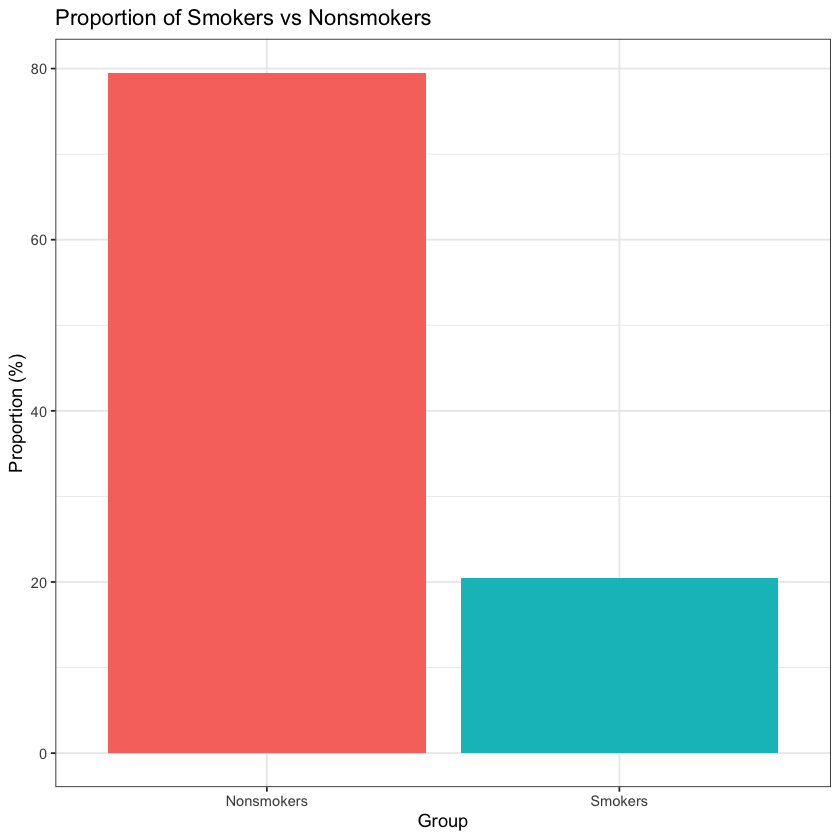

In [31]:
insurance %>%
  group_by(smoker) %>%
  summarise(n = n()) %>%
  mutate(prop = (n/sum(n))*100) %>%
  ggplot(aes(x = smoker, y = prop, fill = smoker)) +
  geom_col(show.legend = F) + 
  theme_bw() +
  labs(title = "Proportion of Smokers vs Nonsmokers",
       y = "Proportion (%)",
       x = "Group") +
  theme(plot.title = element_text(hjust = 0.0)) +
  scale_x_discrete(labels = c("Nonsmokers", "Smokers"))

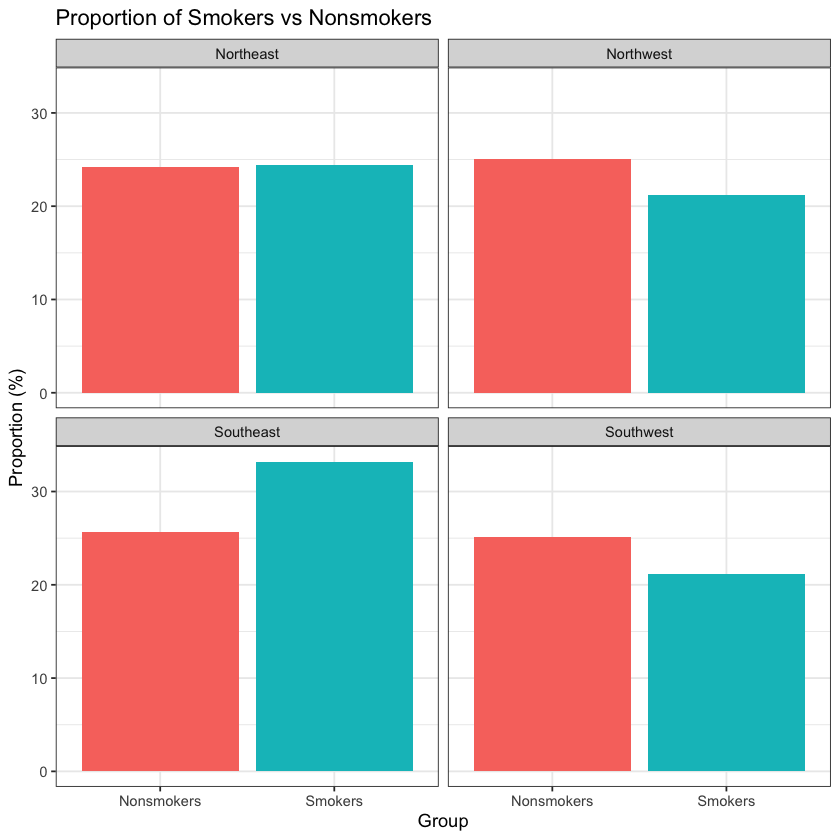

In [32]:
options(dplyr.summarise.inform = FALSE)
insurance %>%
  group_by(smoker, region) %>%
  summarise(n = n()) %>%
  mutate(prop = round((n / sum(n)) * 100, digits = 3)) %>%
  ggplot(aes(x = smoker, y = prop, fill = smoker)) +
  geom_col(show.legend = F) + theme_bw() + 
  labs(title = "Proportion of Smokers vs Nonsmokers",
       y = "Proportion (%)",
       x = "Group") +
  facet_wrap( ~ region,
              labeller = as_labeller(
                c(
                  "northeast" = "Northeast",
                  "northwest" = "Northwest",
                  "southeast" = "Southeast",
                  "southwest" = "Southwest"
                )
              )) +
  theme(plot.title = element_text(hjust = 0.0)) +
  scale_x_discrete(labels = c("Nonsmokers", "Smokers"))

## 2.5 Proability of Women as Smokers

In [33]:
insurance %>%
  group_by(sex, smoker) %>%
  summarize(number = n())

sex,smoker,number
<chr>,<chr>,<int>
female,no,547
female,yes,115
male,no,516
male,yes,159


$$
P(\text{female | smoker}) = \frac {\text {n(female} \cap \text {smoker)}}{\text{n(smoker)}}
$$

In [34]:
n_female_and_smoker <- 115
n_smoker <- 547	+ 115 + 516 + 159

p_female_and_smoker <- 
  round(n_female_and_smoker/n_smoker, digits = 3)

message("The probability of a female policyholder as a smoker is ",
        p_female_and_smoker, ".")

The probability of a female policyholder as a smoker is 0.086.



## 2.6 Probability of Men as Smokers

In [35]:
insurance %>%
  group_by(sex, smoker) %>%
  summarize(number = n())

sex,smoker,number
<chr>,<chr>,<int>
female,no,547
female,yes,115
male,no,516
male,yes,159


$$P(\text {male | smoker)} = \frac { \text{n(male} \cap \text {smoker)}}{\text {n(smoker)}}$$

In [36]:
n_male_and_smoker <- 159
n_smoker <- 547	+ 115 + 516 + 159

p_male_and_smoker <- 
  round(n_male_and_smoker/n_smoker, digits = 3)

message("The probability of a male policyholder as a smoker is ", 
        p_male_and_smoker)

The probability of a male policyholder as a smoker is 0.119



In [37]:
# Comparison between male and female given they are smokers
tibble("P(Female | Smoker)" = p_female_and_smoker,
       "P(Male | Smoker)" = p_male_and_smoker)

P(Female | Smoker),P(Male | Smoker)
<dbl>,<dbl>
0.086,0.119


# 3 Correlation

## 3.1 Correlation matrix

In [44]:
library(DataExplorer)

Warning message:
“package ‘DataExplorer’ was built under R version 4.1.3”


ERROR: Error: package or namespace load failed for ‘DataExplorer’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘xfun’ 0.38 is already loaded, but >= 0.39 is required


In [39]:
insurance %>%
  select(c(age, bmi, children, charges)) %>%
  DataExplorer::plot_correlation(
    cor_args = list(method = 'spearman', use = 'complete.obs'),
    ggtheme = theme_minimal(), 
    title = "Correlation matrix: charges, children, bmi, age") 

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): namespace ‘xfun’ 0.38 is being loaded, but >= 0.39 is required


## 3.2 Correlation between BMI and charges

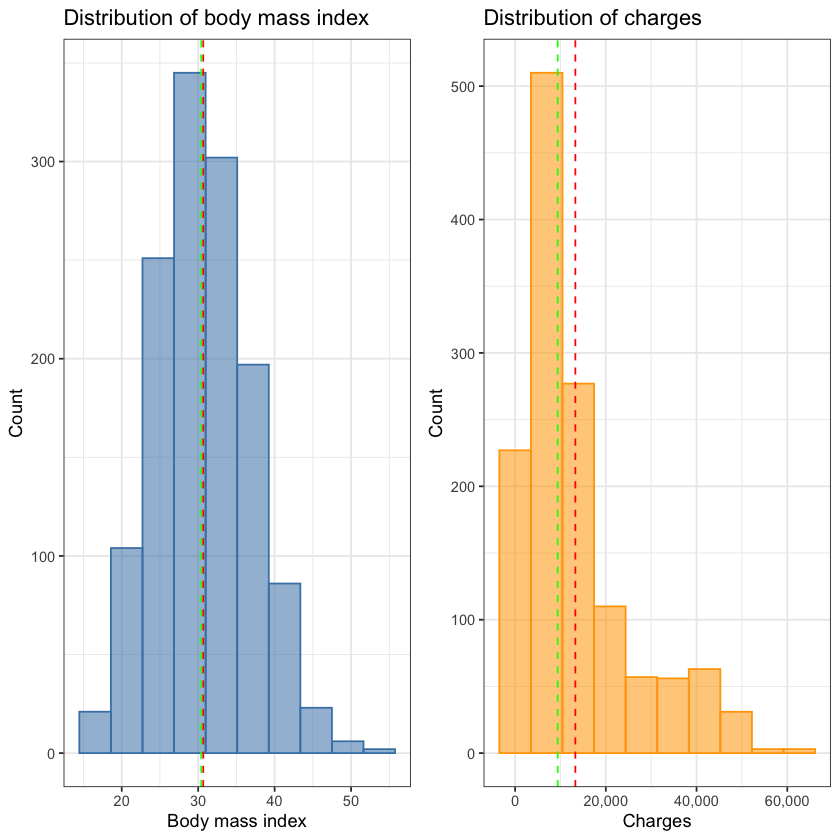

In [45]:
bmi_dist <-
  ggplot(insurance, aes(x = bmi)) +
  geom_histogram(bins = 10, color = "steelblue", 
                 fill = "steelblue", aes(alpha = 0.5), show.legend = F) +
  geom_vline(xintercept = mean(insurance$bmi), 
             color = "red", lty ="dashed") +
  geom_vline(xintercept = median(insurance$bmi), 
             color = "green", lty ="dashed") +
  theme_bw() + labs(title = "Distribution of body mass index",
                    x = "Body mass index", y = "Count")

charges_dist <-
  ggplot(insurance, aes(x = charges)) +
  geom_histogram(bins = 10, color = "orange", 
                 fill = "orange", aes(alpha = 0.5), show.legend = F) +
  geom_vline(xintercept = mean(insurance$charges), 
             color = "red", lty ="dashed") +
  scale_x_continuous(labels = comma) +
    geom_vline(xintercept = median(insurance$charges), 
             color = "green", lty ="dashed") +
  theme_bw() + labs(title = "Distribution of charges",
                    x = "Charges", y = "Count")

gridExtra::grid.arrange(bmi_dist, charges_dist, ncol = 2, nrow = 1)

In [47]:
insurance %>%
  select(bmi, charges) %>%
  psych::describe() %>%
  select(c(mean, median, skew, kurtosis)) 

,mean,median,skew,kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>
bmi,30.66345,30.400,0.2832775,-0.06163411
charges,13279.12149,9386.161,1.5119923,1.58687418


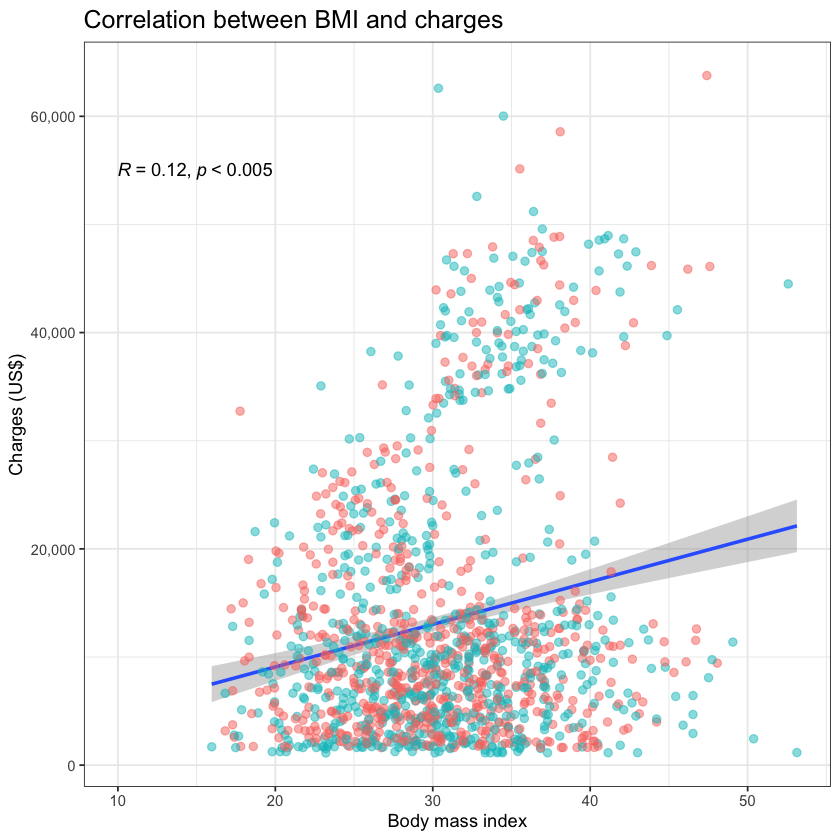

In [48]:
insurance %>%
  ggplot(aes(x = bmi, y = charges)) +
  geom_smooth(method = "lm", formula = "y ~ x") +
  geom_point(
    aes(color = sex),
    size = 2,
    alpha = 0.5,
    show.legend = F
  ) +
  stat_cor(
    method = "spearman",
    label.x = 10,
    label.y =  55000,
    p.accuracy = 0.005
  ) +
  scale_y_continuous(labels = comma) +
  theme_bw() +
  labs(title = "Correlation between BMI and charges",
       y = "Charges (US$)",
       x = "Body mass index") +
  theme(axis.text.x = element_text(size = 9),
        plot.title = element_text(size = 15))

In [49]:
# Another method to check the correlation
cor(x = insurance$bmi, y = insurance$charges, method = "spearman") %>%
  round(digits = 3)

[1] 0.12

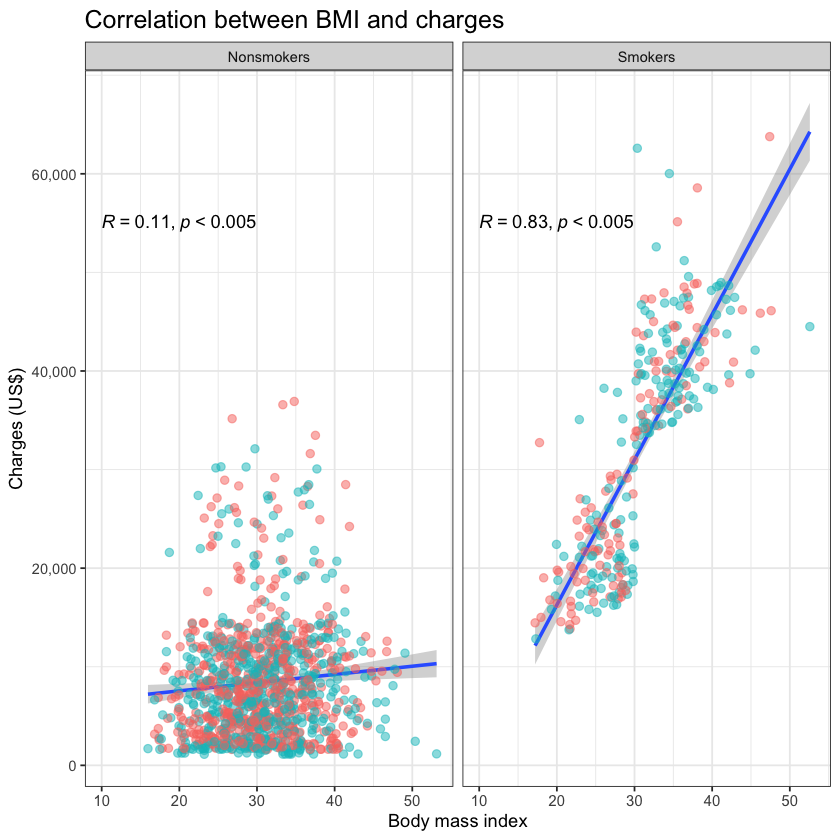

In [50]:
# is there any relationship between BMI and charges across smoking groups?
insurance %>%
  ggplot(aes(x = bmi, y = charges)) +
  geom_smooth(method = "glm", formula = "y ~ x") +
  geom_point(
    aes(color = sex),
    size = 2,
    alpha = 0.5,
    show.legend = F
  ) +
  # adding a correlation stat
  stat_cor(
    method = "spearman",
    label.x = 10,
    label.y =  55000,
    p.accuracy = 0.005
  ) +
  # adding comma ito the y-axis 
  scale_y_continuous(labels = comma) +
  theme_bw() +
  labs(title = "Correlation between BMI and charges",
       y = "Charges (US$)",
       x = "Body mass index") +
  theme(axis.text.x = element_text(size = 9),
        plot.title = element_text(size = 15)) +
  facet_wrap(~ smoker,
             labeller = as_labeller(c("no" = "Nonsmokers",
                                      "yes" = "Smokers")))

## 4.3 Correlation between age and charges

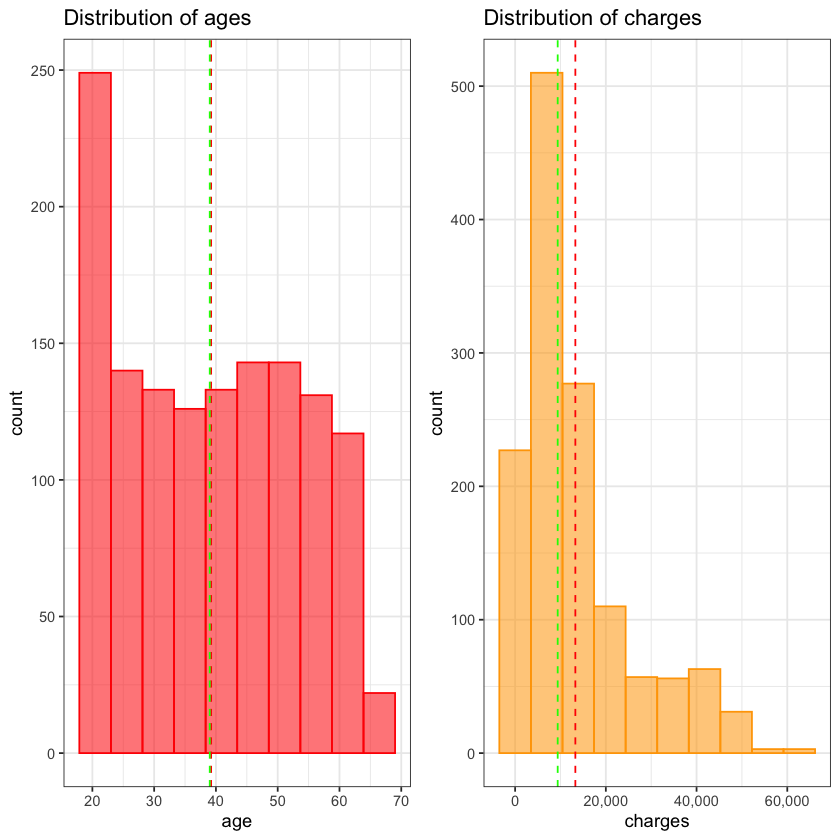

In [51]:
ages_dist <-
  ggplot(insurance, aes(x = age)) +
  geom_histogram(
    bins = 10,
    color = "red",
    fill = "red",
    aes(alpha = 0.5),
    show.legend = F
  ) +
  geom_vline(xintercept = mean(insurance$age), 
             color = "red", lty ="dashed") +
  geom_vline(xintercept = median(insurance$age), 
             color = "green", lty ="dashed") +
  theme_bw() + labs(title = "Distribution of ages")

charges_dist <-
  ggplot(insurance, aes(x = charges)) +
  geom_histogram(
    bins = 10,
    color = "orange",
    fill = "orange",
    aes(alpha = 0.5),
    show.legend = F
  ) +
  geom_vline(xintercept = mean(insurance$charges), 
             color = "red", lty ="dashed") +
  geom_vline(xintercept = median(insurance$charges), 
             color = "green", lty ="dashed") +
  scale_x_continuous(labels = comma) +
  theme_bw() + labs(title = "Distribution of charges")

gridExtra::grid.arrange(ages_dist, charges_dist, 
                        ncol = 2, nrow = 1)

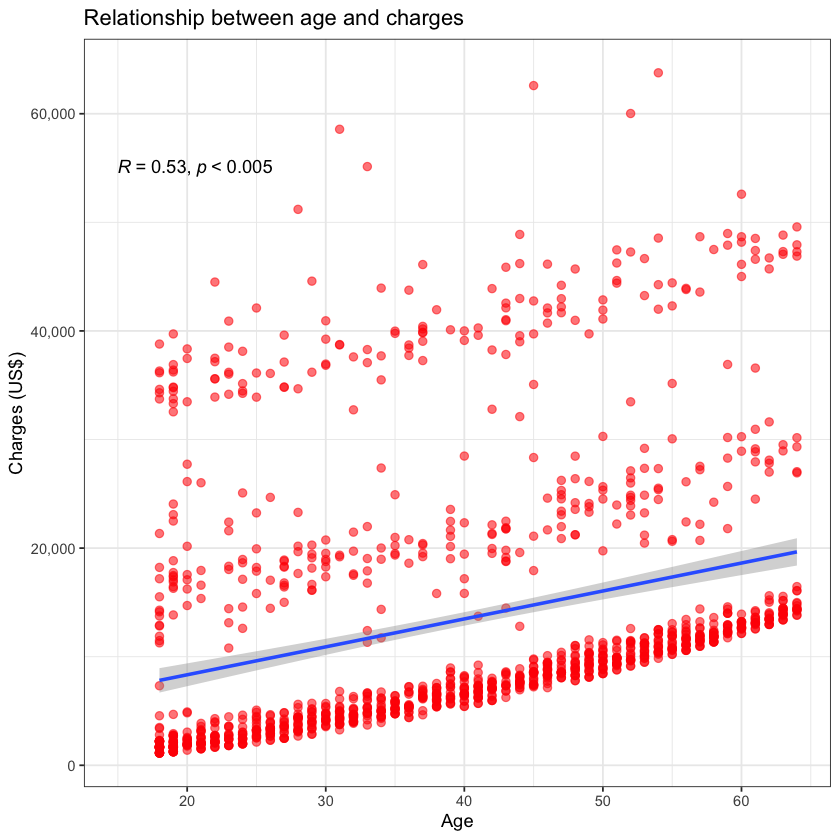

In [52]:
# is there any relationship between age and charges?
ggplot(insurance, aes(x = age, y = charges)) +
  geom_point(
    color = "red",
    size = 2,
    aes(alpha = 0.3),
    show.legend = F
  ) +
  geom_smooth(method = 'lm', formula = 'y ~ x') +
  stat_cor(
    method = "spearman",
    label.x = 15,
    label.y =  55000,
    p.accuracy = 0.005
  ) +
scale_y_continuous(labels = comma) +
  theme_bw() +
  labs(title = "Relationship between age and charges",
       x = "Age", y = "Charges (US$)")

# 4 Hypothesis Testing

## 4.1 Difference between smokers and nonsmokers in term of insurance charges

In [53]:
# Disabling printing in scientific notations
options(scipen = 99, digits = 5)

# Performing Man-Whitney U test
wilcox.test(charges ~ smoker, data = insurance, digits = 5)


	Wilcoxon rank sum test with continuity correction

data:  charges by smoker
W = 7403, p-value <0.0000000000000002
alternative hypothesis: true location shift is not equal to 0


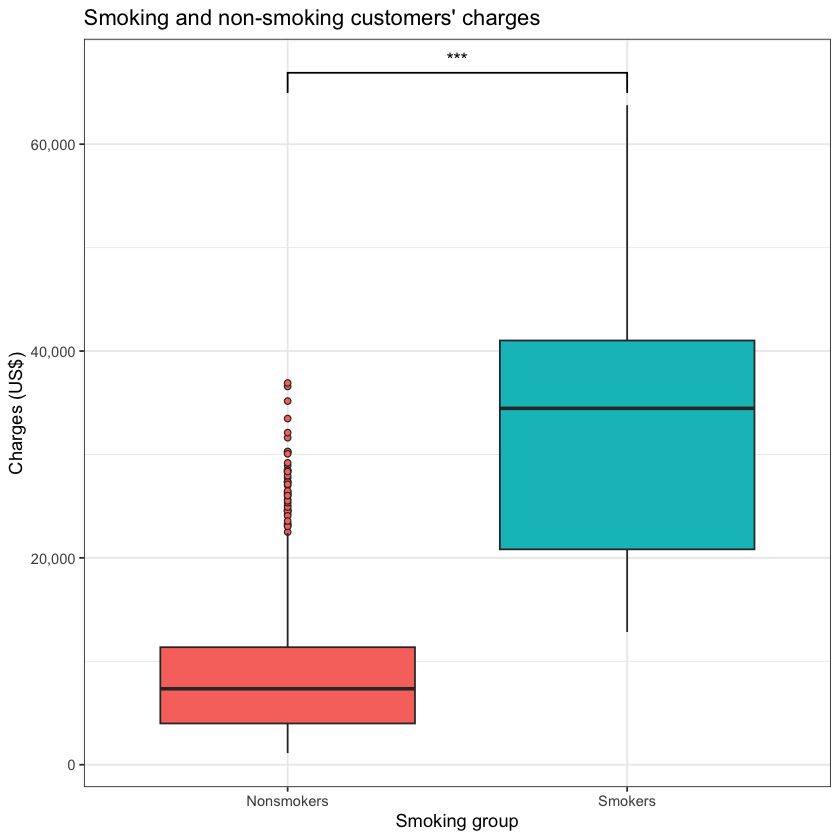

In [54]:
ggplot(insurance, aes(x = smoker, y = charges)) +
  geom_boxplot(aes(fill = smoker), show.legend = F, outlier.shape =  21) +
  stat_signif(comparisons = list(c("no", "yes")), 
              map_signif_level = T, test = "wilcox.test") +
  scale_y_continuous(labels = comma) +
  scale_x_discrete(labels = c("Nonsmokers", "Smokers")) +
  labs(title = "Smoking and non-smoking customers' charges",
       x = "Smoking group", y = "Charges (US$)") +
  theme_bw()

## 4.2 Male and female difference in insurance charges

In [55]:
# Disabling printing in scientific notations
options(scipen = 99, digits = 5)

# Performing Man-Whitney U test
wilcox.test(charges ~ sex, data = insurance, digits = 5)


	Wilcoxon rank sum test with continuity correction

data:  charges by sex
W = 220654, p-value = 0.69
alternative hypothesis: true location shift is not equal to 0


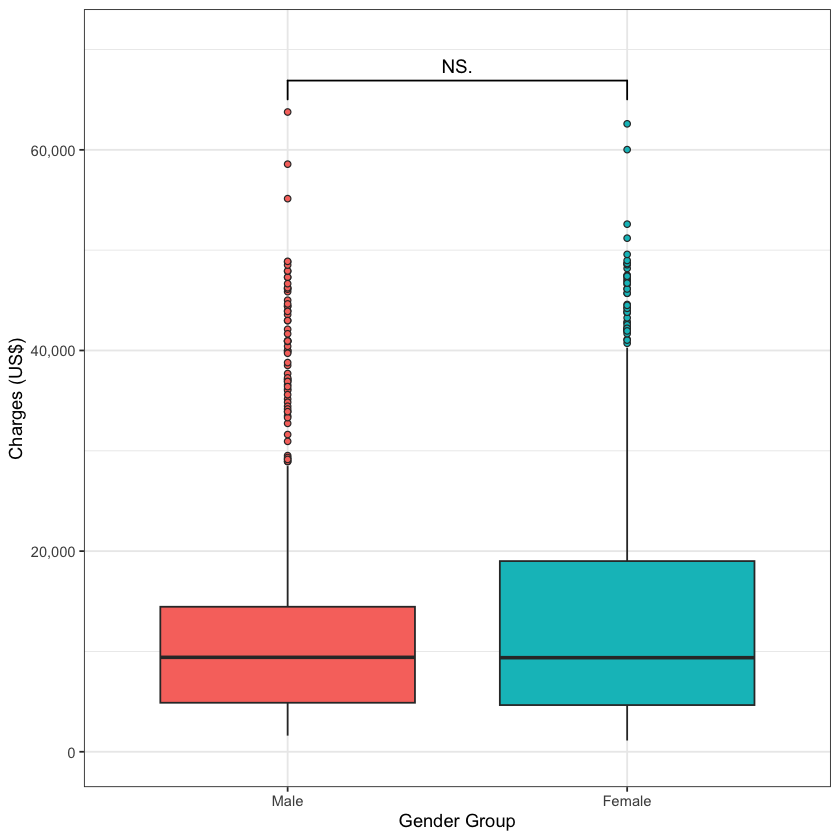

In [56]:
# Passing the data
insurance %>%
  # Make a boxplot with significance test result 
  ggplot(aes(x = sex, y = charges)) +
  geom_boxplot(aes(fill = sex), outlier.shape = 21, show.legend = F) +
  stat_signif(comparisons = list(c("male", "female")), 
              map_signif_level = T, textsize = 4, 
              test = "wilcox.test") +
  scale_y_continuous(labels = comma, limits = c(0, 70500)) +
  scale_x_discrete(label = c("Male", "Female")) +
  labs(x = "Gender Group", y = "Charges (US$)") +
  theme_bw()

## 4.2 Difference between customers with BMI \< 25 significantly and customers with BMI \> 25 in terms of charges

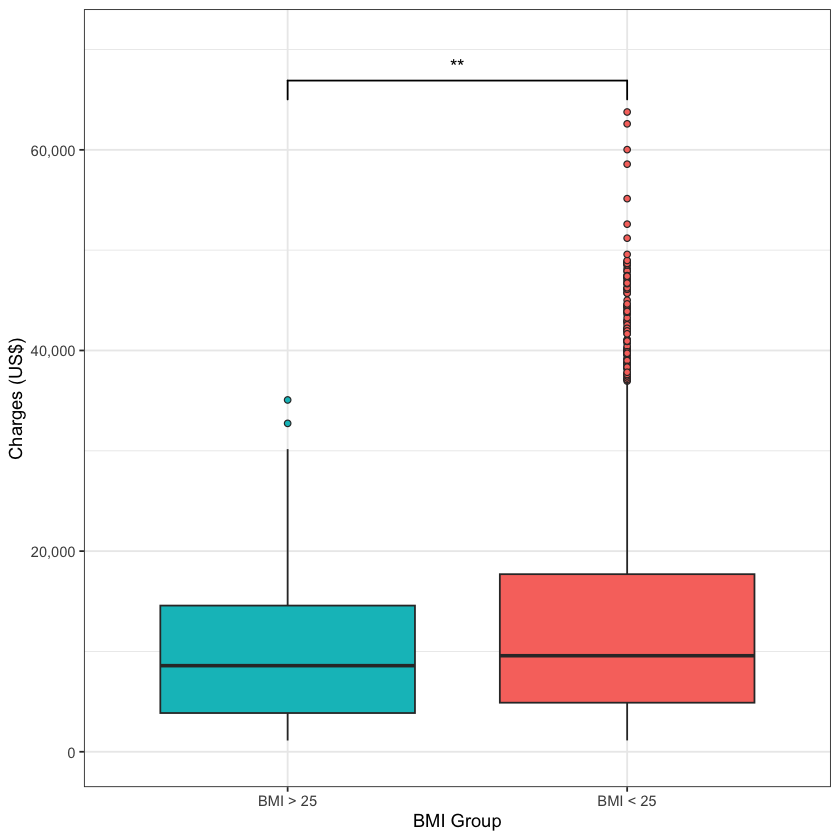

In [57]:
insurance %>% 
  mutate(bmi = replace(bmi, bmi>25, "above")) %>%
  mutate(bmi = replace(bmi, bmi<25, "below")) %>%
  subset(bmi != 25) %>%
  ggplot(aes(x = reorder(bmi, charges), y = charges)) +
  geom_boxplot(aes(fill = bmi), show.legend = F, 
               outlier.shape = 21) +
  stat_signif(comparisons = list(c("below", "above")), 
              map_signif_level = T, textsize = 4, 
              test = "wilcox.test") +
  scale_y_continuous(labels = comma, limits = c(0, 70500)) +
  scale_x_discrete(label = c("BMI > 25", "BMI < 25")) +
  labs(x = "BMI Group", y = "Charges (US$)") +
  theme_bw()